# Logistic Regression




# Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset.head(10))
print(dataset.describe())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000   

# Splitting the dataset into Independent and Dependent Variable


In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
print("-----X----")
print(X[:10])
print(type(X))
print(X.shape)
print("-----y----")
print(y[:10])
print(y.shape)

-----X----
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]
<class 'numpy.ndarray'>
(400, 2)
-----y----
[0 0 0 0 0 0 0 1 0 0]
(400,)


# Splitting the dataset into the Training set and Test set

In [7]:

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("-----X_train-------")
print(X_train[:5])
print(type(X_train))
print(X_train.shape)

print("---------X_test------")
print(X_test[:5])
print(type(X_test))
print(X_test.shape)

print("---------y_train------")
print(y_train[:5])
print(type(y_train))
print(y_train.shape)


print("---------y_test------")
print(y_test[:5])
print(type(y_test))
print(y_test.shape)

-----X_train-------
[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]]
<class 'numpy.ndarray'>
(300, 2)
---------X_test------
[[   30 87000]
 [   38 50000]
 [   35 75000]
 [   30 79000]
 [   35 50000]]
<class 'numpy.ndarray'>
(100, 2)
---------y_train------
[0 1 0 1 1]
<class 'numpy.ndarray'>
(300,)
---------y_test------
[0 0 0 0 0]
<class 'numpy.ndarray'>
(100,)


# Feature Scaling

In [8]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Fitting Logistic Regression to the Training set

In [9]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# Predicting the Test set results

In [10]:

y_pred = classifier.predict(X_test)



# Making the Confusion Matrix

In [17]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]




# Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


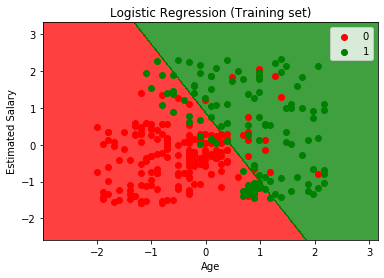

In [14]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



# Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


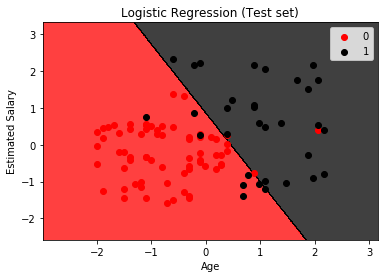

In [15]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'black'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()